# Basic Car Speed 

## Problem Statement

We would like to determine the speed of a car based on the bumpiness and slope of the road. For this, we have a list of the speed from a list of drivers.

In [1]:
import pandas as pd

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/aalmagro/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = pd.read_csv("terrain.csv")

In [6]:
df[["bumpiness","grade"]]

,bumpiness,grade
0,0.639427,0.099355
1,0.025011,0.685680
2,0.275029,0.544466
3,0.223211,0.977843
4,0.736471,0.358674
5,0.676699,0.398140
6,0.892180,0.189809
7,0.086939,0.122160
8,0.421922,0.848033
9,0.029797,0.454717


In [37]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [35]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

In [16]:
# Load the library
from sklearn.linear_model import LogisticRegression
# Create an instance of the classifier
clf=LogisticRegression()
# Fit the data
clf.fit(X,y)

/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

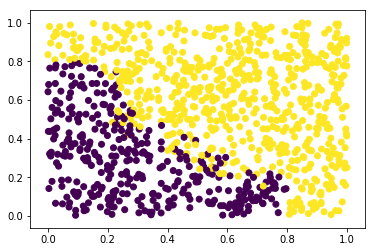

In [13]:
plt.scatter(df["bumpiness"],df["grade"],c=df["target"]);

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [17]:
clf.fit(X_train,y_train)

/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
cross_val_score(clf,X,y,cv=5,scoring="accuracy").mean()

/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

0.919998349958749

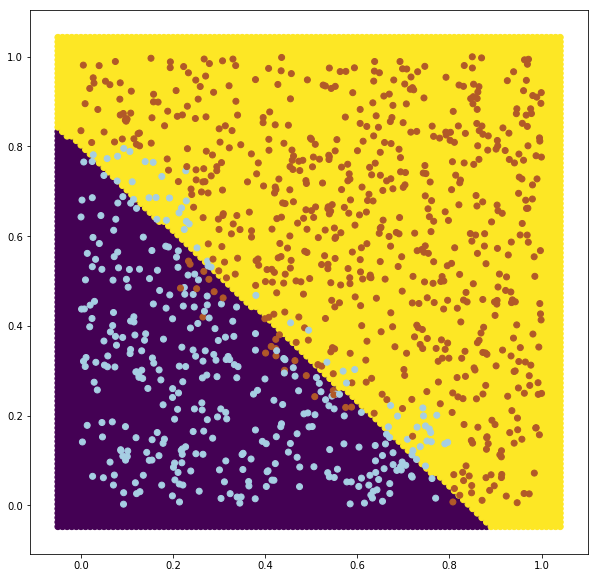

In [40]:
draw(clf,X,y,0.01)

In [42]:
# Load the library
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of the classifier
clfk=KNeighborsClassifier(n_neighbors=5)
# Fit the data
clfk.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
cross_val_score(clfk,X,y,cv=5,scoring="accuracy").mean()

0.937983774594365

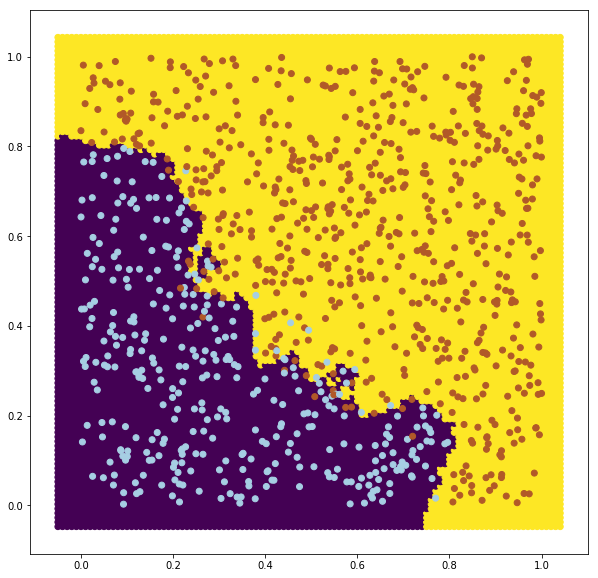

In [44]:
draw(clfk,X,y,0.01)

In [48]:
# Metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
precision_score(y_test,clfk.predict(X_test))

# Cross Validation
cross_val_score(clfk,X,y,scoring="precision")

/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.96585366, 0.94545455, 0.94063927])

In [60]:
cross_val_score(clfk,X,y,scoring="recall").mean()

/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9459230548377834

In [52]:
print(classification_report(y_test,clfk.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        31
         1.0       0.95      0.91      0.93        69

   micro avg       0.91      0.91      0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [53]:
confusion_matrix(y_test, clfk.predict(X_test))

array([[28,  3],
       [ 6, 63]])

In [55]:
confusion_matrix?

# SVM

In [56]:
from sklearn.svm import SVC

In [57]:
clfSVC = SVC(kernel="linear",C=10)

In [59]:
clfSVC.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [61]:
cross_val_score(clfSVC,X,y,scoring="recall").mean()

/Users/aalmagro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9381854722939993

In [71]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
from sklearn.model_selection import GridSearchCV
clfSVC = GridSearchCV(SVC(kernel="poly"),
                     param_grid = {"C":[1,10,100,1000,10000],
                                  "degree":[2,3,4,5]},
                     cv=3,
                     scoring="recall",
                     verbose=0)

In [73]:
clfSVC.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000, 10000], 'degree': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [74]:
clfSVC.best_score_

0.9984537037037037

In [75]:
clfSVC.best_params_

{'C': 1, 'degree': 5}

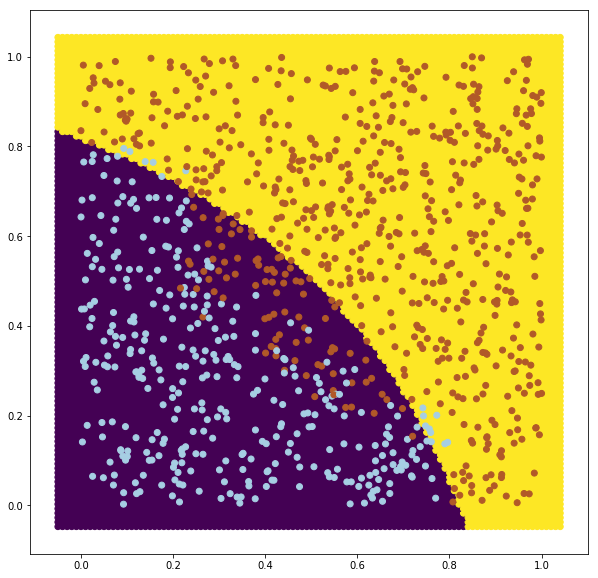

In [76]:
draw(clfSVC,X,y,0.01)

# Decision Tree Classifier

In [79]:
# Import library
from sklearn.tree import DecisionTreeClassifier
# Create instance
clfTree = DecisionTreeClassifier(min_samples_leaf=20,max_depth=3)
# Fit the data
clfTree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

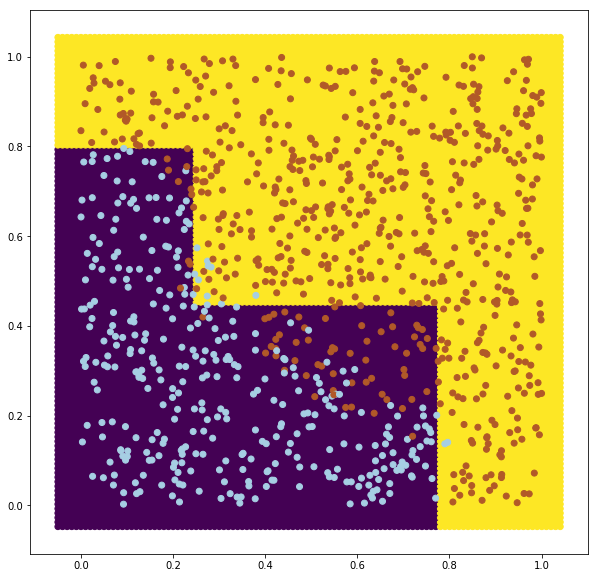

In [80]:
draw(clfTree,X,y,0.01)

# Now more realistic, using GridSearchCV
## scoring = accuracy

In [89]:
clfTree = GridSearchCV(DecisionTreeClassifier(),
                      param_grid = {"max_depth":np.arange(2,20),
                                   "min_samples_leaf": np.arange(10,100,10)},
                      cv=4,
                       scoring="accuracy"
                      )

In [90]:
clfTree.fit(X,y)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]), 'min_samples_leaf': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [91]:
clfTree.best_score_

0.946

In [92]:
clfTree.best_params_

{'max_depth': 6, 'min_samples_leaf': 10}

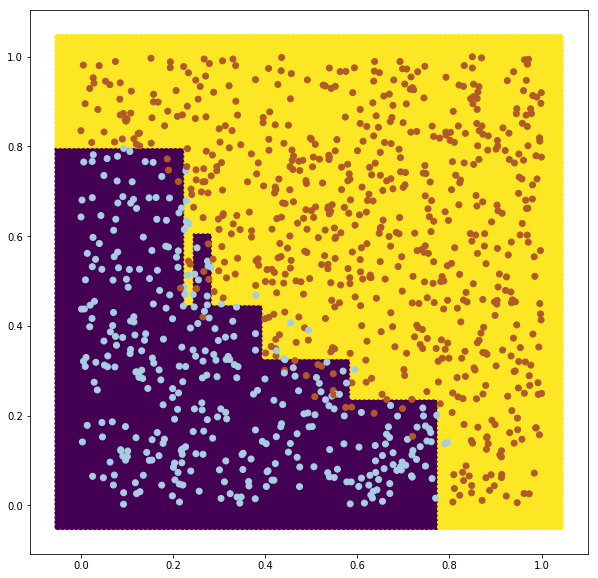

In [106]:
D = draw(clfTree.best_estimator_,X,y,0.01)

In [94]:
pred = clfTree.best_estimator_.predict_proba(X_test)

In [95]:
print(pred)

[[0.77777778 0.22222222]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.69230769 0.30769231]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.2        0.8       ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.64       0.36      ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.1        0.9       ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.64       0.36      ]
 [0.         1.        ]
 [0.         1.        ]
 [0.09090909 0.90909091]
 [0.17647059 0.82352941]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]


In [97]:
from sklearn.metrics import roc_curve, auc
#We choose the prob target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test, clfTree.best_estimator_.predict_proba(X_test)[:,target_pos])

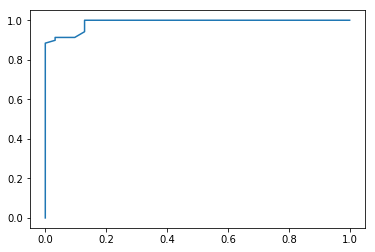

In [98]:
plt.plot(fp,tp);

In [99]:
auc(fp,tp)

0.9885460495558671

In [102]:
cross_val_score(clfTree,X,y,cv=5,scoring="roc_auc").mean()

0.9711397664460227

In [103]:
import pickle

In [104]:
pickle.dump(clfTree, open("modelo.pickle","wb"))

In [110]:
!ls -lrth

total 4560
-rw-r--r--@ 1 aalmagro  staff    33K Sep 13 17:02 terrain.csv
-rw-r--r--@ 1 aalmagro  staff   441K Sep 13 17:02 housing-test.csv
-rw-r--r--@ 1 aalmagro  staff   450K Sep 13 17:02 house_prices.csv
-rw-r--r--@ 1 aalmagro  staff    23K Sep 13 17:02 diabetes.csv
-rw-r--r--@ 1 aalmagro  staff   8.0K Sep 13 17:02 Regression - Advanced Housing Price-blank.ipynb
-rw-r--r--@ 1 aalmagro  staff   6.8K Sep 13 17:02 Classification - Pima Indians.ipynb
-rw-r--r--@ 1 aalmagro  staff   128K Sep 13 21:28 Regression - Advanced Housing Price-simple_13092019.ipynb
-rw-r--r--  1 aalmagro  staff    34K Sep 14 10:36 modelo.pickle
-rw-r--r--  1 aalmagro  staff   1.8K Sep 14 10:42 Loading_pickle_modelo.ipynb
-rw-r--r--@ 1 aalmagro  staff   1.1M Sep 14 10:43 Classification - Basic Car Speed_14092019.ipynb


In [107]:
mi_modelo = pickle.load(open("modelo.pickle","rb"))

In [108]:
mi_modelo.best_params_

{'max_depth': 6, 'min_samples_leaf': 10}

In [109]:
type(mi_modelo)

sklearn.model_selection._search.GridSearchCV